# Tree-based Classification

## Preprocessing

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


traindf = pd.read_json('D:/data/train.json')
traindf.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


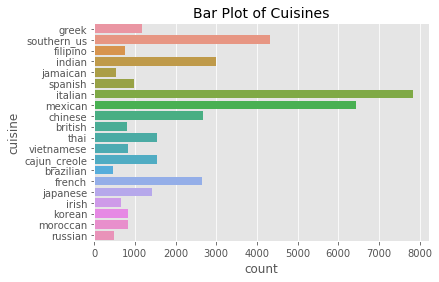

In [3]:
import seaborn as sns

sns.countplot(y = 'cuisine', data = traindf)
plt.title('Bar Plot of Cuisines', fontsize = 14)
plt.show()

In [13]:
from collections import Counter


print('Prop\t Recipe\t Cuisine\n')
for cuisine in (Counter(traindf['cuisine']
                       ).most_common()): print(round(cuisine[1]/traindf.cuisine.count()*100, 2), '%\t', cuisine[1],'\t',cuisine[0])

Prop	 Recipe	 Cuisine

19.71 %	 7838 	 italian
16.19 %	 6438 	 mexican
10.86 %	 4320 	 southern_us
7.55 %	 3003 	 indian
6.72 %	 2673 	 chinese
6.65 %	 2646 	 french
3.89 %	 1546 	 cajun_creole
3.87 %	 1539 	 thai
3.58 %	 1423 	 japanese
2.95 %	 1175 	 greek
2.49 %	 989 	 spanish
2.09 %	 830 	 korean
2.07 %	 825 	 vietnamese
2.06 %	 821 	 moroccan
2.02 %	 804 	 british
1.9 %	 755 	 filipino
1.68 %	 667 	 irish
1.32 %	 526 	 jamaican
1.23 %	 489 	 russian
1.17 %	 467 	 brazilian


In [18]:
print('Total of %d recipes\n'% len(traindf))
print('Total of %d types of cuisines including %s\n'% \
     (len(traindf['cuisine'].unique()), traindf['cuisine'].unique().tolist()))

Total of 39774 recipes

Total of 20 types of cuisines including ['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian']



In [19]:
ingredients_list_tr = []
for line in traindf['ingredients']:
    ingredients_list_tr.append(line)
    
ingredients_set_tr = set()
for i in range(len(ingredients_list_tr)):
    for ingredient in ingredients_list_tr[i]:
        ingredients_set_tr.add(ingredient)
    
print('Total of %d uique ingredients'% len(ingredients_set_tr))

Total of 6714 uique ingredients


In [20]:
total_usage_list_tr = []
for i in range(len(ingredients_list_tr)):
    for ingredient in ingredients_list_tr[i]:
        total_usage_list_tr.append(ingredient)
print('Most commonly use ingredients:\n')
for i in range(20):
    print(Counter(total_usage_list_tr).most_common(20)[i])

Most commonly use ingredients:

('salt', 18049)
('onions', 7972)
('olive oil', 7972)
('water', 7457)
('garlic', 7380)
('sugar', 6434)
('garlic cloves', 6237)
('butter', 4848)
('ground black pepper', 4785)
('all-purpose flour', 4632)
('pepper', 4438)
('vegetable oil', 4385)
('eggs', 3388)
('soy sauce', 3296)
('kosher salt', 3113)
('green onions', 3078)
('tomatoes', 3058)
('large eggs', 2948)
('carrots', 2814)
('unsalted butter', 2782)


### Regular Expression & Lemmatizer

In [23]:
import re


def sub_match(pattern, sub_pattern, ingredients):
    for i in ingredients.index.values:
        for j in range(len(ingredients[i])):
            ingredients[i][j] = re.sub(pattern, sub_pattern, ingredients[i][j].strip())
            ingredients[i][j] = ingredients[i][j].strip()
    re.purge()
    return ingredients

def regex_sub_match(series):
    # remove all units
    p0 = re.compile(r'\s*(oz|ounc|ounce|pound|lb|inch|inches|kg|to)\s*[^a-z]')
    series = sub_match(p0, ' ', series)
    # remove all digits
    p1 = re.compile(r'\d+')
    series = sub_match(p1, ' ', series)
    # remove all the non-letter characters
    p2 = re.compile('[^\w]')
    series = sub_match(p2, ' ', series)
    return series

In [26]:
traindf = traindf.set_index('id')
ingredients_list = traindf['ingredients']
ingredients_list = regex_sub_match(ingredients_list)
ingredients_list

id
10259    [romaine lettuce, black olives, grape tomatoes...
25693    [plain flour, ground pepper, salt, tomatoes, g...
20130    [eggs, pepper, salt, mayonaise, cooking oil, g...
22213                  [water, vegetable oil, wheat, salt]
13162    [black pepper, shallots, cornflour, cayenne pe...
6602     [plain flour, sugar, butter, eggs, fresh ginge...
42779    [olive oil, salt, medium shrimp, pepper, garli...
3735     [sugar, pistachio nuts, white almond bark, flo...
16903    [olive oil, purple onion, fresh pineapple, por...
12734    [chopped tomatoes, fresh basil, garlic, extra ...
5875     [pimentos, sweet pepper, dried oregano, olive ...
45887    [low sodium soy sauce, fresh ginger, dry musta...
2698     [Italian parsley leaves, walnuts, hot red pepp...
41995    [ground cinnamon, fresh cilantro, chili powder...
31908    [fresh parmesan cheese, butter, all purpose fl...
24717    [tumeric, vegetable stock, tomatoes, garam mas...
34466    [greek yogurt, lemon curd, confectioners sug

In [27]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize as tk


lemmatizer = WordNetLemmatizer()

# remove all the words that are not nouns -- keep the essential ingredients
def lemma(series):
    for i in series.index.values:
        for j in range(len(series[i])):
            # get rid of all extra spaces
            series[i][j] = series[i][j].strip()
            # Tokenize a string to split off punctuation other than periods
            token = tk(series[i][j])
            # set all the plural nouns into singular nouns
            for k in range(len(token)):
                token[k] = lemmatizer.lemmatize(token[k])
            token = ' '.join(token)
            # write them back
            series[i][j] = token
    return series

In [28]:
ingredients_list = lemma(ingredients_list)

In [29]:
traindf['ingredients_cleaned'] = ingredients_list
traindf['ingredients_cleaned_string'] = [' '.join(line).strip() for line in traindf['ingredients_cleaned']]

In [30]:
traindf.sample(10)

,cuisine,ingredients,ingredients_cleaned,ingredients_cleaned_string
id,,,,
44540,vietnamese,"[fish sauce, shallot, coconut, garlic clove, p...","[fish sauce, shallot, coconut, garlic clove, p...",fish sauce shallot coconut garlic clove pork b...
44754,southern_us,"[sugar, salt, baking powder, unsalted butter, ...","[sugar, salt, baking powder, unsalted butter, ...",sugar salt baking powder unsalted butter all p...
20537,italian,"[cremini mushroom, large egg, linguine, part s...","[cremini mushroom, large egg, linguine, part s...",cremini mushroom large egg linguine part skim ...
7715,southern_us,"[ground ginger, water, large egg, salt, molass...","[ground ginger, water, large egg, salt, molass...",ground ginger water large egg salt molasses ba...
11075,southern_us,"[bourbon whiskey, fresh basil, fresh basil lea...","[bourbon whiskey, fresh basil, fresh basil lea...",bourbon whiskey fresh basil fresh basil leaf s...
16931,southern_us,"[sugar, peach, evaporated milk, self raising f...","[sugar, peach, evaporated milk, self raising f...",sugar peach evaporated milk self raising flour...
12847,mexican,"[fresh cilantro, fresh lime juice, coarse salt...","[fresh cilantro, fresh lime juice, coarse salt...",fresh cilantro fresh lime juice coarse salt ol...
33535,mexican,"[tomatillo, california chile, whole chicken, s...","[tomatillo, california chile, whole chicken, s...",tomatillo california chile whole chicken salt ...
28059,cajun_creole,"[chervil, fennel, cognac, large shrimp, water,...","[chervil, fennel, cognac, large shrimp, water,...",chervil fennel cognac large shrimp water coars...


In [31]:
traindf.to_csv('D:/data/train_cleaned.csv')

## Preparation for Modeling & Embedding

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder as LE


rawdf_tr = pd.read_csv('D:/data/train_cleaned.csv')
def tt_split(cuisine):
    cuisine_population = rawdf_tr.loc[(rawdf_tr['cuisine'] == cuisine)].index.values
    train, test = train_test_split(cuisine_population, test_size=0.15, random_state=0)
    train = train.tolist()
    test = test.tolist()
    return train, test

cuisine_list = traindf['cuisine'].unique().tolist()

ix_train = [] # 85% for training (and validation)
ix_test = [] # 15% for hold-out test
for _ in cuisine_list:
    temp_train, temp_test = tt_split(_)
    ix_train += temp_train
    ix_test += temp_test
    
# DataFrame for training and validation
traindf = rawdf_tr[['cuisine', 'ingredients_cleaned_string']].loc[ix_train].reset_index(drop=True)
print(traindf.shape)
testdf = rawdf_tr[['cuisine', 'ingredients_cleaned_string']].loc[ix_test].reset_index(drop=True)
print(testdf.shape)


X_train_ls = traindf['ingredients_cleaned_string']
vectorizertr = TfidfVectorizer(stop_words='english', analyzer="word", max_df=0.65, min_df=2, binary=True)
X_train = vectorizertr.fit_transform(X_train_ls)

y_train = traindf['cuisine']
# for xgboost the labels need to be labeled with encoder
le = LE()
y_train_ec = le.fit_transform(y_train)
# for deep learning
y_train_1h = pd.get_dummies(y_train_ec)

X_test_ls = testdf['ingredients_cleaned_string']
vectorizerts = TfidfVectorizer(stop_words='english')
X_test = vectorizertr.transform(X_test_ls)

# y_true
y_true = testdf['cuisine']
y_true_ec = le.fit_transform(y_true)
# for deep learning
y_true_1h = pd.get_dummies(y_true_ec)

(33799, 2)
(5975, 2)


In [35]:
X_train.shape

(33799, 2182)

In [37]:
y_train_1h.shape

(33799, 20)

## Modeling Using Tree-based Algorithms

### Decision Tree Classifier

In [42]:
from sklearn import tree
from sklearn.metrics import classification_report

clf = tree.DecisionTreeClassifier(min_samples_split = 200)
clf.fit(X_train, y_train_ec)
y_pred = clf.predict(X_test)

print(classification_report(y_true_ec, y_pred))

             precision    recall  f1-score   support

          0       0.47      0.39      0.43        71
          1       0.25      0.13      0.17       121
          2       0.62      0.56      0.59       232
          3       0.62      0.69      0.65       401
          4       0.37      0.30      0.33       114
          5       0.38      0.48      0.42       397
          6       0.53      0.45      0.49       177
          7       0.77      0.72      0.74       451
          8       0.47      0.29      0.36       101
          9       0.69      0.78      0.73      1176
         10       0.66      0.39      0.49        79
         11       0.57      0.54      0.55       214
         12       0.60      0.39      0.47       125
         13       0.78      0.82      0.80       966
         14       0.54      0.43      0.48       124
         15       0.28      0.16      0.21        74
         16       0.53      0.60      0.56       648
         17       0.51      0.30      0.37   

### Radom Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier


rfclf = RandomForestClassifier(n_estimators = 1000, min_samples_split = 100, n_jobs = 2)

rfclf.fit(X_train, y_train_ec)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
y_pred = rfclf.predict(X_test)

print(classification_report(y_true_ec, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.31      0.44        71
          1       0.90      0.07      0.14       121
          2       0.82      0.62      0.71       232
          3       0.66      0.88      0.76       401
          4       0.72      0.25      0.37       114
          5       0.57      0.45      0.50       397
          6       0.91      0.44      0.59       177
          7       0.81      0.92      0.86       451
          8       0.78      0.14      0.24       101
          9       0.65      0.92      0.77      1176
         10       0.97      0.43      0.60        79
         11       0.91      0.62      0.74       214
         12       0.94      0.53      0.68       125
         13       0.83      0.93      0.88       966
         14       0.87      0.56      0.68       124
         15       0.81      0.18      0.29        74
         16       0.58      0.77      0.66       648
         17       0.85      0.19      0.31   

### XGBoost Classifier

In [45]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-8.1.0-posix-seh-rt_v6-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb
from xgboost.sklearn import XGBClassifier


XGBmodel = XGBClassifier(booster='gbtree', n_jobs=2, objective='binary:logistic', gamma=0.3, colsample_bytree=0.2,
                         learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=1333, subsample=0.5)

In [46]:
XGBmodel.fit(X_train, y_train_ec)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.3, learning_rate=0.05,
       max_delta_step=0, max_depth=4, min_child_weight=3, missing=None,
       n_estimators=1333, n_jobs=2, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.5)

In [47]:
y_pred = XGBmodel.predict(X_test)

print(classification_report(y_true_ec, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.56      0.63        71
          1       0.58      0.39      0.47       121
          2       0.79      0.76      0.78       232
          3       0.80      0.83      0.82       401
          4       0.66      0.61      0.63       114
          5       0.61      0.61      0.61       397
          6       0.81      0.69      0.75       177
          7       0.88      0.92      0.90       451
          8       0.69      0.56      0.62       101
          9       0.79      0.91      0.85      1176
         10       0.92      0.68      0.78        79
         11       0.82      0.72      0.77       214
         12       0.85      0.75      0.80       125
         13       0.92      0.93      0.92       966
         14       0.82      0.77      0.79       124
         15       0.58      0.43      0.50        74
         16       0.73      0.79      0.76       648
         17       0.71      0.49      0.58   

C:\Users\charl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
